In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [17]:
COVIDPovCount = pd.read_csv('COVIDpovertycount.csv',index_col = 0)
COVIDPovCount

,State,cases,deaths,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
0,Alabama,387786,14345,"4,763,811","801,758"
1,Alaska,18316,367,"720,866","80,224"
2,Arizona,426614,18857,"7,013,461","990,291"
3,Arkansas,161569,3301,"2,925,473","492,306"
4,California,2664110,102387,"38,818,530","4,972,955"
5,Colorado,766512,37828,"5,577,050","540,579"
6,Connecticut,1314995,104185,"3,468,263","358,519"
7,Delaware,234327,7813,"940,779","114,691"
8,District of Columbia,229466,10822,"669,029","107,806"
9,Florida,1726811,63147,"20,882,673","2,854,438"


In [18]:
COVIDPovCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            51 non-null     object
 1   cases                            51 non-null     int64 
 2   deaths                           51 non-null     int64 
 3   All Ages SAIPE Poverty Universe  51 non-null     object
 4   All Ages in Poverty Count        51 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.4+ KB


In [19]:
COVIDPovCount['All Ages SAIPE Poverty Universe'] = COVIDPovCount['All Ages SAIPE Poverty Universe'].str.replace(',', '').astype('int64')
COVIDPovCount['All Ages in Poverty Count'] = COVIDPovCount['All Ages in Poverty Count'].str.replace(',', '').astype('int64')

COVIDPovCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            51 non-null     object
 1   cases                            51 non-null     int64 
 2   deaths                           51 non-null     int64 
 3   All Ages SAIPE Poverty Universe  51 non-null     int64 
 4   All Ages in Poverty Count        51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [20]:
COVIDPovCount.head()

,State,cases,deaths,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
0,Alabama,387786,14345,4763811,801758
1,Alaska,18316,367,720866,80224
2,Arizona,426614,18857,7013461,990291
3,Arkansas,161569,3301,2925473,492306
4,California,2664110,102387,38818530,4972955


In [13]:
COVIDPovCount.isnull().sum()

State                              0
cases                              0
deaths                             0
All Ages SAIPE Poverty Universe    0
All Ages in Poverty Count          0
dtype: int64

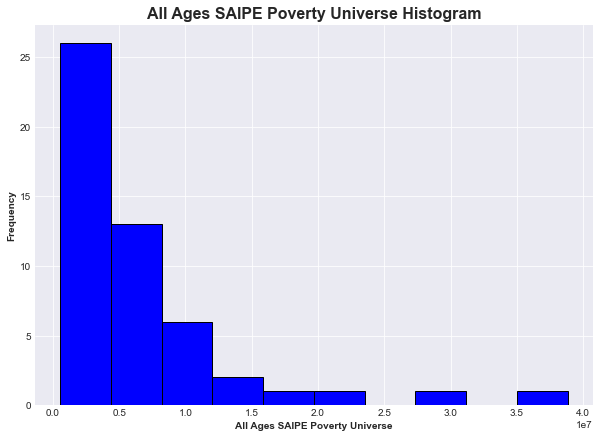

In [14]:
plt.style.use('seaborn-darkgrid')

COVIDPovCount['All Ages SAIPE Poverty Universe'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('All Ages SAIPE Poverty Universe Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages SAIPE Poverty Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');